## Objectives of Project
The Objective of project involves-

- Exploratory Data Analysis of MNIST
- Data preprocessing
- Building Deep learning model(ANN)
- Evaluation of model

#### Importing libraries

In [2]:
!pip install pydot

In [4]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

#### Loading dataset

In [8]:
fashion_train = pd.read_csv("Image classification using ANN/fashion-mnist_train.csv")
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
fashion_test = pd.read_csv("Image classification using ANN/fashion-mnist_test.csv")

In [9]:
fashion_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [10]:
fashion_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [12]:
fashion_train.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [13]:
fashion_train.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

#### Train-test-split of the data

In [15]:
X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

### Exploratory data analysis

### Visualization 

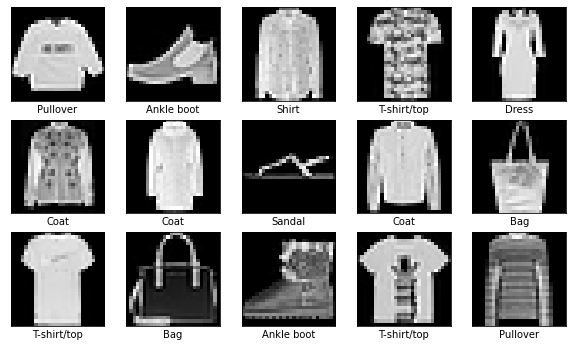

In [25]:
x_train_reshape = X_train_fashion.values.reshape(-1,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

#### Pixel intensity of images
We know the RGB will have values between 0 to 255 where 0 being the lowest intensity(black) and 255 being the highest(white).

In [33]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

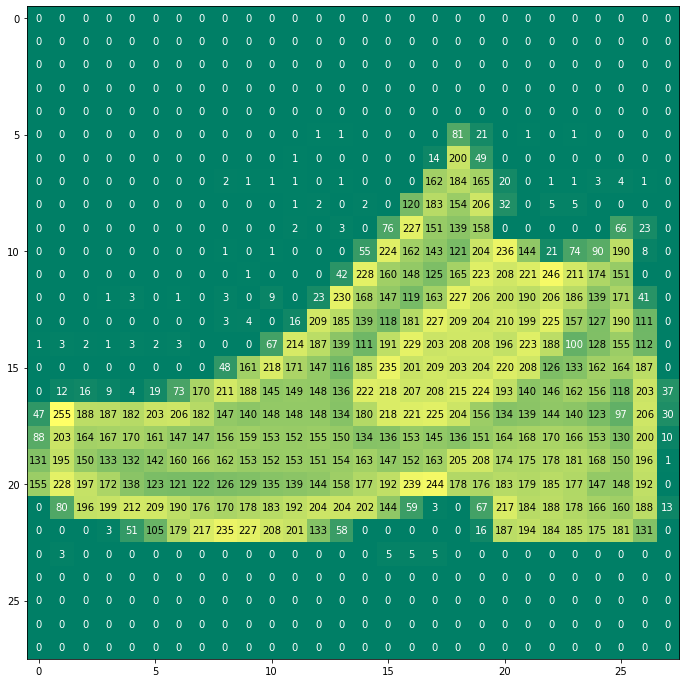

In [36]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualize_input(x_train_reshape[1],ax)
plt.show()

 all the highest intensity pixel ranging around 220-255 have bright colors and rest (green) have 0 intensity . Here there are also dull intensity pixels inside the object and it also has been captured

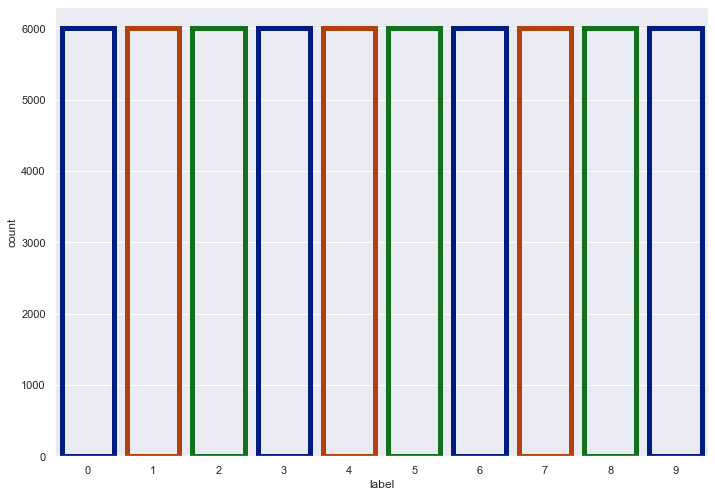

In [39]:
#Setting plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})

#Countplot
ax = sns.countplot(x="label", data=fashion_train,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3),
                   order = fashion_train['label'].value_counts().index)

### Data Processing

#### Encoding the label

In [41]:
# Encoding Labels

y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

### Building Deep Learning model- Artificial Neural Network

steps to follow:
1. Define the model
2. Compile the model with loss function
3. fitting the model to data

#### Defining the model

- To define the model we need the Sequential() function which helps us to build the base neural network on that we have to decide the dense layers and neurons.

In [57]:
# Creating base neural networks
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
 dropout_4 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 24)               96        
 hNormalization)                                      

### Compiling the Model

- The base model of neural network is ready. It's time to connect the brain for the neural network. In this part we tell the neural network on how to learn the model where we signify the type of loss function and which optimizer and metrics to use.



In [61]:
model.compile(loss="categorical_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

### Fitting the model


In [62]:
model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 11s 10ms/step - loss: 1.0555 - accuracy: 0.6500
Epoch 2/30
600/600 [==============================] - 6s 9ms/step - loss: 0.7187 - accuracy: 0.7567
Epoch 3/30
600/600 [==============================] - 6s 9ms/step - loss: 0.6614 - accuracy: 0.7786
Epoch 4/30
600/600 [==============================] - 6s 10ms/step - loss: 0.6268 - accuracy: 0.7881
Epoch 5/30
600/600 [==============================] - 5s 9ms/step - loss: 0.6039 - accuracy: 0.7951
Epoch 6/30
600/600 [==============================] - 6s 10ms/step - loss: 0.5848 - accuracy: 0.8031
Epoch 7/30
600/600 [==============================] - 6s 10ms/step - loss: 0.5771 - accuracy: 0.8063
Epoch 8/30
600/600 [==============================] - 6s 10ms/step - loss: 0.5677 - accuracy: 0.8105
Epoch 9/30
600/600 [==============================] - 6s 10ms/step - loss: 0.5574 - accuracy: 0.8121
Epoch 10/30
600/600 [==============================] - 5s 9ms/step - loss: 0.5574 - accuracy:

- We got the accuracy of around 83% and loss is around 0.5

### Evaluation model

#### Test accuracy

In [63]:
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 3s 3ms/step - loss: 0.4313 - accuracy: 0.8722


In [64]:
# Printing the test accuracy results
print('Fashion MNIST Test accuracy:', round(test_acc_fashion,4))

Fashion MNIST Test accuracy: 0.8722
